<h1><b style="font-family:Iceberg">Exploratory Data Analysis On Netflix Dataset</b></h1>
 



<h3><i>Importing Libraries and Loading The Dataset</i></h3>

In [4]:
BERE Ted-Jose P. Gregory
GUISSOU Salifou

import numpy as np # linear algebra
import pandas as pd # for data preparation
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pylab as plt
import seaborn as sns


dff=pd.read_csv('netflix.csv')
dff.shape

(8807, 12)

<h3><i>Top 5 Directors on Netflix</i></h3>

In [5]:
dff['director']=dff['director'].fillna('No Director Specified')
filtered_directors=pd.DataFrame()
filtered_directors=dff['director'].str.split(',',expand=True).stack()
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='No Director Specified']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop5=directors.head(5)
directorsTop5=directorsTop5.sort_values(by=['Total Content'])
fig1=px.bar(directorsTop5,x='Total Content',y='Director',title='Top 5 Directors on Netflix')
fig1.show()

<h3><i>Top 5 Actors on Netflix</i></h3>


In [6]:
dff['cast']=dff['cast'].fillna('No Cast Specified')
filtered_cast=pd.DataFrame()
filtered_cast=dff['cast'].str.split(',',expand=True).stack()
filtered_cast=filtered_cast.to_frame()
filtered_cast.columns=['Actor']
actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='No Cast Specified']
actors=actors.sort_values(by=['Total Content'],ascending=False)
actorsTop5=actors.head(10)
actorsTop5=actorsTop5.sort_values(by=['Total Content'])
actorsTop5

,Actor,Total Content
4186,Boman Irani,25
33367,Yuki Kaji,25
1905,Andrea Libman,25
38446,Shah Rukh Khan,26
25410,Rajesh Kava,26
23624,Om Puri,27
15541,Julie Tejwani,28
30303,Takahiro Sakurai,30
26941,Rupa Bhimani,31
2612,Anupam Kher,39


<h3><i>Top 5 Genres on Netflix</i></h3>

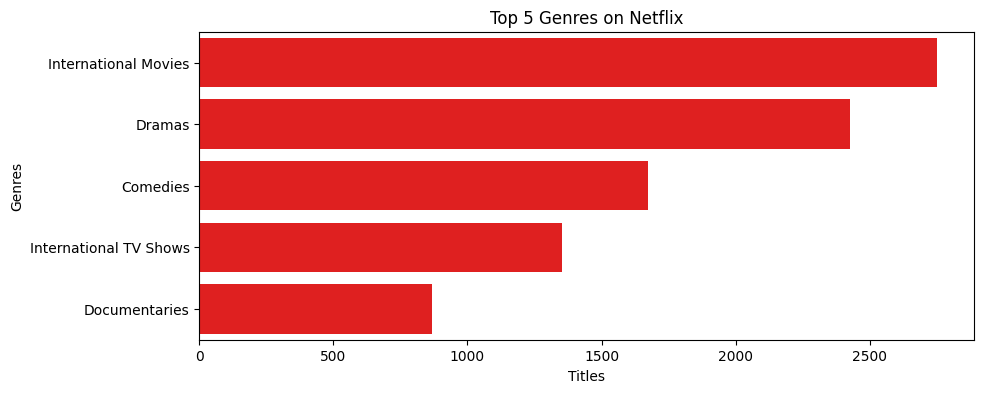

In [7]:
filtered_genres = dff.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,4))
g = sns.countplot(color='red',y = filtered_genres, order=filtered_genres.value_counts().index[:5])
plt.title('Top 5 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

<h3><i>Five Oldest Movies on Netflix</i></h3>

In [8]:
oldest = dff.sort_values("release_year",ascending = True)
oldest = oldest[oldest['duration'] != ""]
oldest[["release_year", 'title']][:5]


,release_year,title
4250,1925,Pioneers: First Women Filmmakers*
7790,1942,Prelude to War
8205,1942,The Battle of Midway
8660,1943,Undercover: How to Operate Behind Enemy Lines
8739,1943,Why We Fight: The Battle of Russia


<h3><i>Top 5 Countries in terms of content</i></h3>

In [9]:
country_count=dff['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:5]
topcountries 

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199


<h3><i>Difference bettwen Movies and Tv Shows in terms of content released on Netflix</i></h3>

Text(0.5, 1.0, 'Difference bettwen Movies and Tv Shows by content released on Netflix')

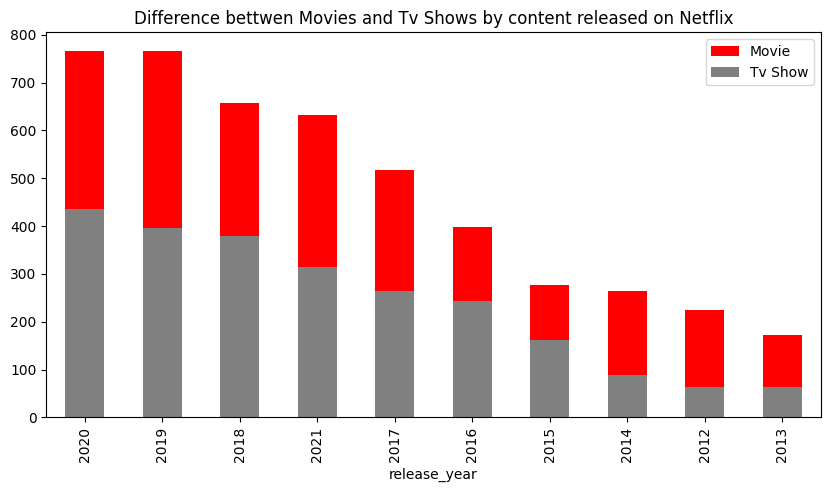

In [13]:
plt.figure(figsize=(10,5))
dff[dff["type"]=="Movie"]["release_year"].value_counts()[:10].plot(kind="bar",color="Red")
dff[dff["type"]=="TV Show"]["release_year"].value_counts()[:10].plot(kind="bar",color="Grey")
L=plt.legend()
L.get_texts()[0].set_text("Movie")
L.get_texts()[1].set_text('Tv Show')
plt.title("Difference bettwen Movies and Tv Shows by content released on Netflix")

